# Acciones Bancolombia
# 2000 -2020

In [1]:
import pandas as pd
import warnings
import yfinance as yf
import rpy2
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(count=3,
                         label="3y",
                         step="year",
                         stepmode="backward"),
                    dict(count=5,
                         label="5y",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10y",
                         step="year",
                         stepmode="backward"),
                    dict(count=15,
                         label="15y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio de la acción"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()


## 0. Importación de Datos

La elección de la base de datos que abarca el periodo 2000-01-01 a 2020-01-01 para analizar las acciones de Bancolombia se justifica por la exclusión del impacto de la pandemia mundial, permitiendo un enfoque claro en factores y tendencias previas a este suceso. La extensión temporal facilita la evaluación del comportamiento de las acciones, buscando determinar si siguen una caminata aleatoria, lo que es esencial para evaluar la eficacia de estrategias de inversión basadas en análisis histórico. Además, la serie temporal presenta irregularidades en la espaciación de los datos, lo que agrega complejidad al análisis y requiere adaptación en las técnicas utilizadas para tener en cuenta la variabilidad en la frecuencia de observaciones.

In [4]:
ticker_name = 'BC'

data = yf.download(ticker_name, start='2000-01-01', end='2020-01-01')
print(data.shape)
data.head()

[*********************100%***********************]  1 of 1 completed
(5031, 6)


Open      High      Low    Close  Adj Close  Volume
Date                                                              
2000-01-03  22.0000  22.09375  21.6875  21.9375  15.344915  286700
2000-01-04  21.9375  22.12500  20.8750  20.9375  14.645428  338700
2000-01-05  20.6875  21.62500  20.6875  21.0625  14.732868  214000
2000-01-06  21.1250  21.31250  20.8750  21.2500  14.864021  232700
2000-01-07  21.2500  21.62500  20.9375  21.3750  14.951456  207800

In [5]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
df.head()

Date    Close
0 2000-01-03  21.9375
1 2000-01-04  20.9375
2 2000-01-05  21.0625
3 2000-01-06  21.2500
4 2000-01-07  21.3750

In [6]:
df.shape

(5031, 2)

In [7]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

In [8]:
%R -i df

In [9]:
%%R
head(df)

        Date   Close
0 2000-01-03 21.9375
1 2000-01-04 20.9375
2 2000-01-05 21.0625
3 2000-01-06 21.2500
4 2000-01-07 21.3750
5 2000-01-10 21.4375


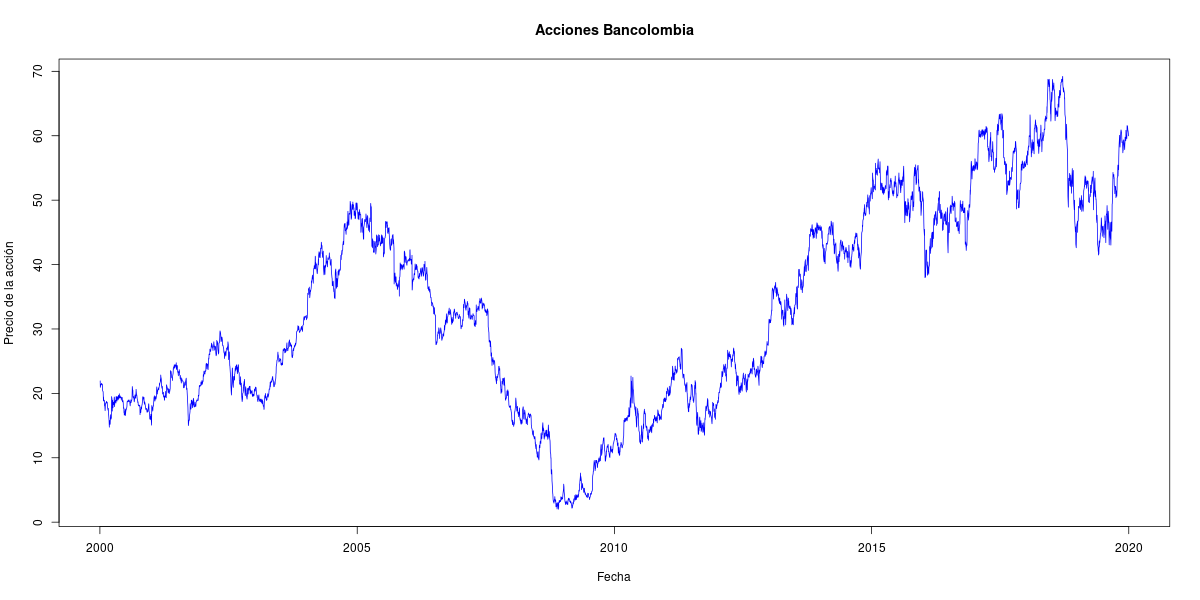

In [10]:
%%R -w 1200 -h 600
    plot(df$Date, df$Close, type='l', col='blue', 
         xlab='Fecha', ylab='Precio de la acción', 
         main='Acciones Bancolombia')

# 1. Estabilizar varianza.

En esta sección se buscará una herramienta para estabilizar la varianza, siempre y cuando pareciera que no se encuentre estabilizada.

#### Familia de transformaciones Box-Cox:

En ocasiones la serie presenta varianza marginal no constante a lo largo del tiempo, lo cual hace necesario tener en cuenta tal característica. En este caso, se siguiere hacer una transformación de potencia para estabilizar la varianza. Esta familia de transformaciones se llaman transformaciones Box-Cox.

$$
    f_{\lambda}(u_{t})= \begin{cases}
        \lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
        \ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
    \end{cases}
$$

note que la familia de funciones dependen del $\lambda$ escogido, pero como se escoge $\lambda$?. La respuesta es usando librerías de $R$ o Python.

**Nota**: Si el lambda calculado es muy cercano a 1, se recomienda no hacer Box-cox

## 1.1. Estimación de $\lambda$

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



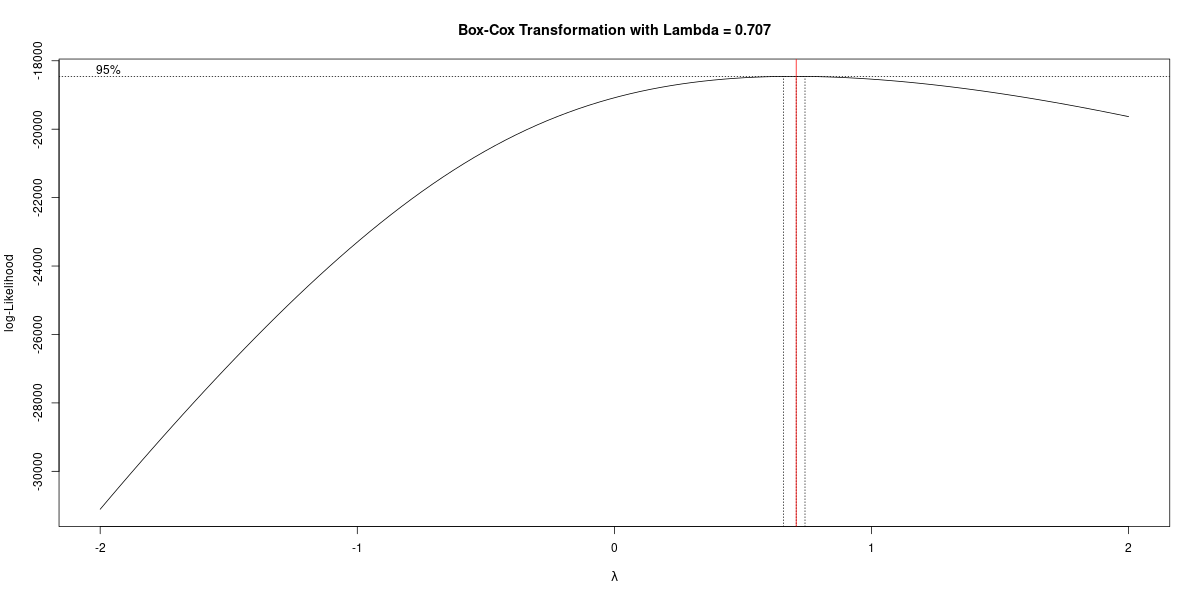

In [11]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)

df$Date <- as.Date(df$Date)
df_Close <- ts(df$Close, frequency=365, start=c(2020, 1))
df <- na.omit(df)

b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

## 1.2. Grafico Box-Cox

In [12]:
from scipy.stats import boxcox

df['BoxCox_Close'], lambda_value = boxcox(df['Close']) 
print(lambda_value)
plot_('Estabilización de la Varianza (Box-cox λ = 0.7)', (df["Date"], df["Close"], "Datos Originales"),
      (df["Date"], df["BoxCox_Close"], "BoxCox"))

0.6985383688094446


In [13]:
%R -i df

# 2. Estimación de la tendencia

## 2.1 Loess

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.075  # Puedes seleccionar el valor de frac que desees
smoothed_values = lowess(df['BoxCox_Close'], df.index, frac=frac, it=0)
trend_removed = df['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df["Date"], df["BoxCox_Close"], "BoxCox"),
      (df["Date"], smoothed_values[:, 1], "Suavizado"),
      (df["Date"], trend_removed, "Tendencia Removida"))
      

In [15]:
%R -i trend_removed

R[write to console]: 
Attaching package: ‘astsa’


R[write to console]: The following object is masked from ‘package:forecast’:

    gas




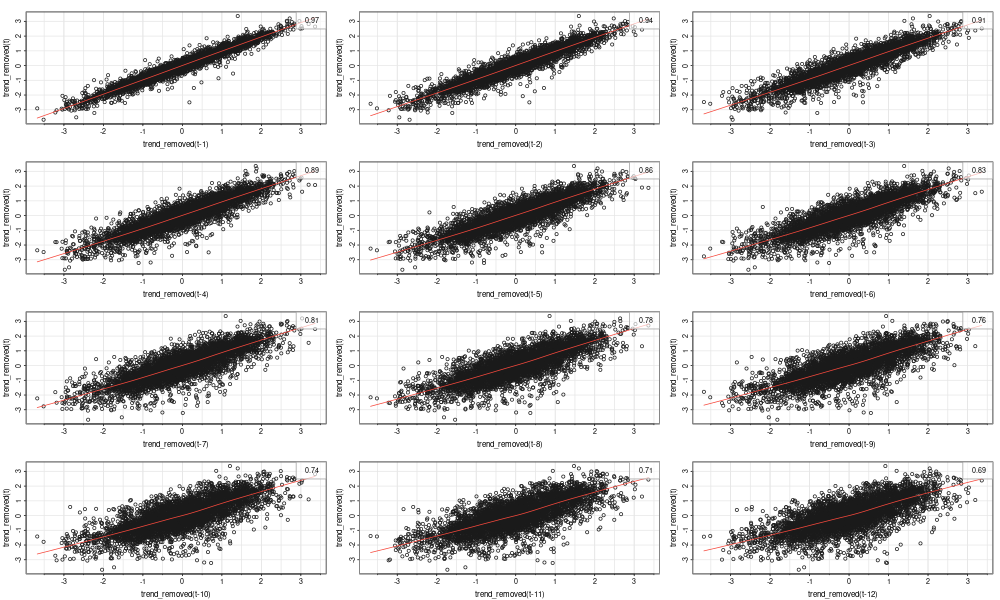

In [16]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

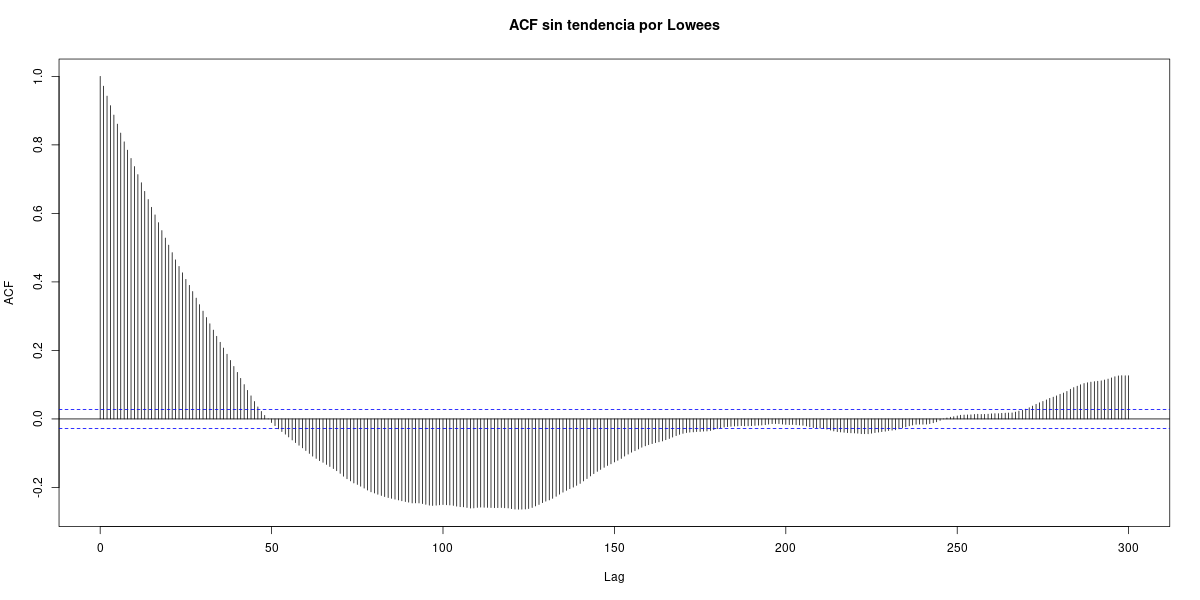

In [17]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 300, main = "ACF sin tendencia por Lowees")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.33964318 1.30430743 1.04133639 0.88863631 0.77452727 0.68651642
 [7] 0.61108043 0.55801082 0.51062538 0.47063909 0.43095791 0.39930435
[13] 0.36461274 0.33649909 0.30871183 0.28631304 0.26677680 0.25027396
[19] 0.22994910 0.21858383 0.20317087 0.19152973 0.18054934 0.17093737
[25] 0.16002699 0.15062834 0.14175458 0.13391384 0.12773989 0.11825390
[31] 0.11296208 0.10905007 0.10024835 0.09527737 0.09139427 0.08798076
[37] 0.08398153 0.07993793 0.07829012 0.07199339 0.07394310 0.07420205
[43] 0.07031967 0.06998893 0.06495524 0.06164358 0.05911016 0.05604123
[49] 0.05643517 0.05659014 0.05975401

$units
[1] "Nats"

$n.partitions
[1] 17

attr(,"class")
[1] "mutualInf"


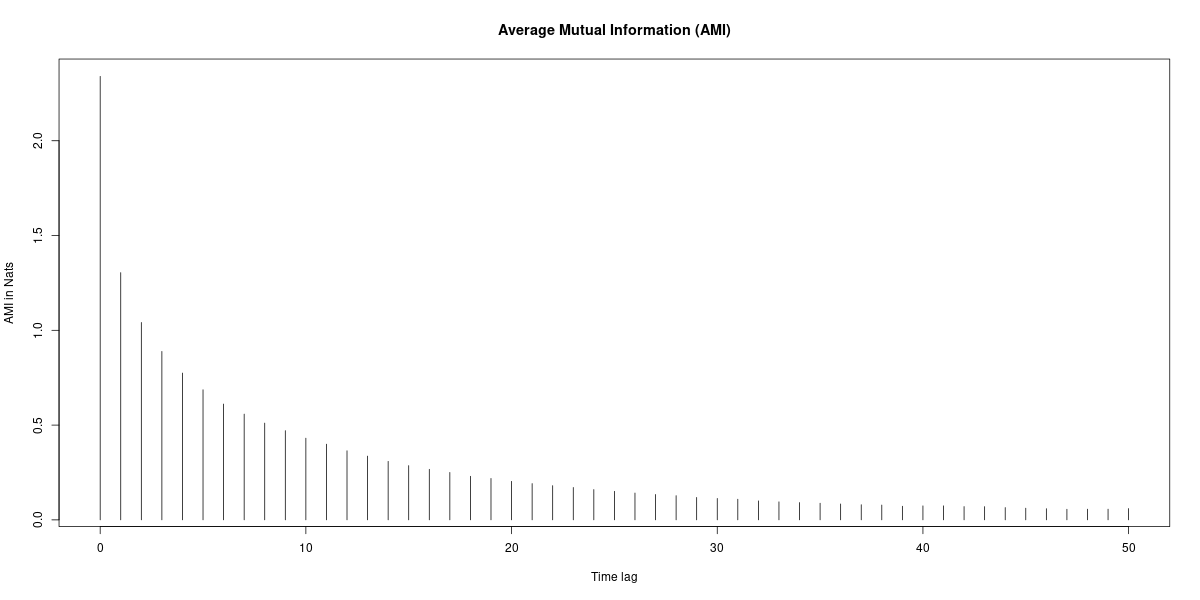

In [18]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [19]:
Close_diff = df['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df["Date"], df["BoxCox_Close"], "BoxCox"),
      (df["Date"], Close_diff, "Diferencia Ordinaria"))

In [20]:
%R -i Close_diff

In [21]:
%%R

Close_diff <- na.omit(Close_diff)

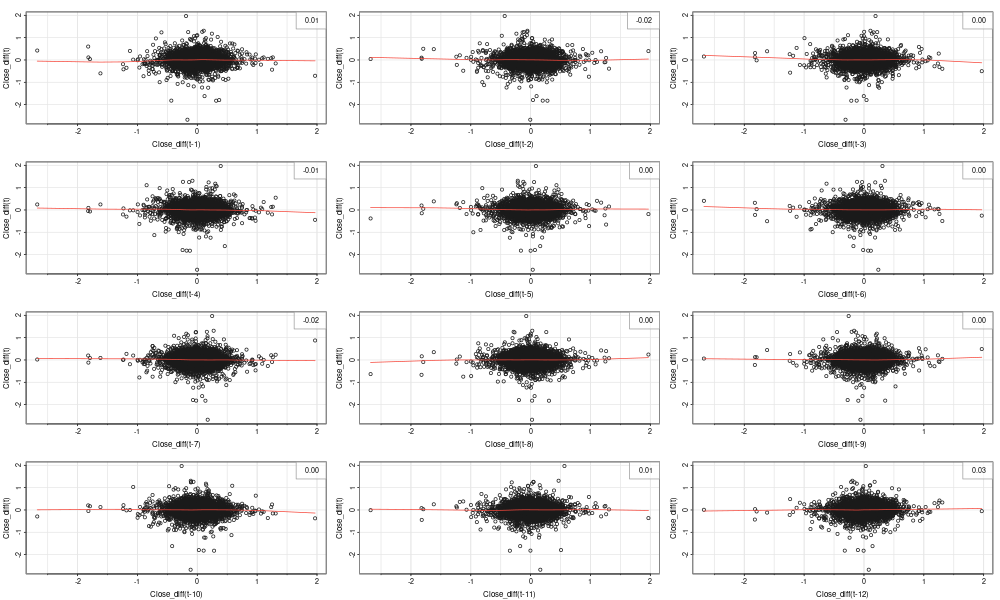

In [22]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

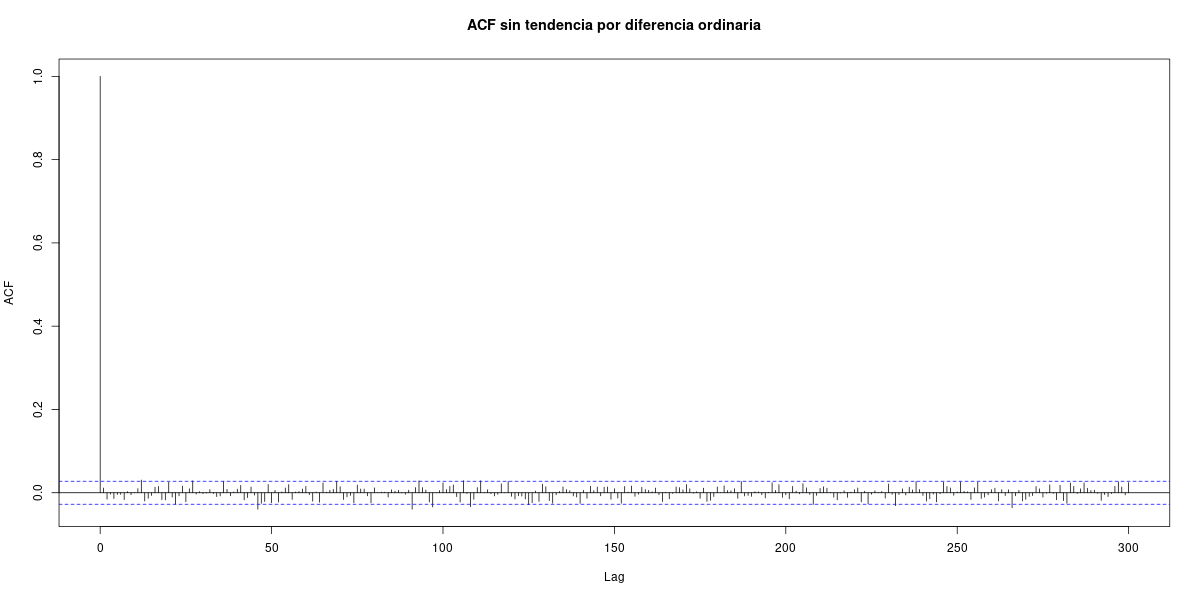

In [23]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 300, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 1.306812246 0.013113215 0.015000105 0.013533168 0.012496490 0.012555434
 [7] 0.013381486 0.011430685 0.009972176 0.009791854 0.011883235 0.010494018
[13] 0.008344084 0.010346795 0.007207030 0.011627845 0.011723016 0.009691315
[19] 0.010764752 0.009058925 0.008675604 0.011662520 0.009737040 0.009398731
[25] 0.010502407 0.010045954 0.008541865 0.009380873 0.010761745 0.006929910
[31] 0.010786714 0.008407528 0.007281039 0.008332557 0.006793247 0.007739975
[37] 0.011427919 0.010014022 0.007245349 0.009449742 0.008005218 0.009144727
[43] 0.008889870 0.007173975 0.008294693 0.008152122 0.007858389 0.011094030
[49] 0.008532020 0.006457348 0.008410712

$units
[1] "Nats"

$n.partitions
[1] 17

attr(,"class")
[1] "mutualInf"


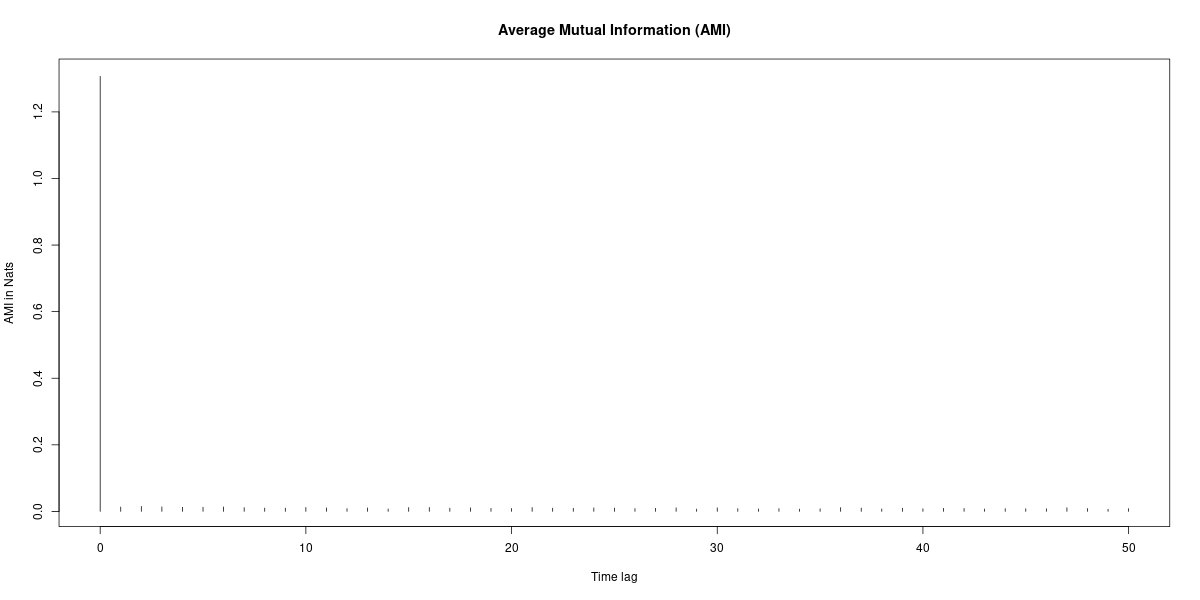

In [24]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

# 3. Estacionalidad

In [25]:
import plotly.express as px

df['Trend_Removed'] = trend_removed
df['Day_Name'] = df['Date'].dt.day_name()

# Crear el box plot utilizando plotly.express
fig = px.box(df, x='Day_Name', y='Trend_Removed', title='Box Plot de trend_removed por Día de la Semana', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Día de la Semana', title_x=0.5)
fig.show()

In [26]:

# Extraer el mes de la fecha
df['Month'] = df['Date'].dt.month_name()

# Crear el box plot utilizando plotly.express
fig = px.box(df, x='Month', y='Trend_Removed', title='Box Plot de trend_removed por Mes', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Mes', title_x=0.5)
fig.show()

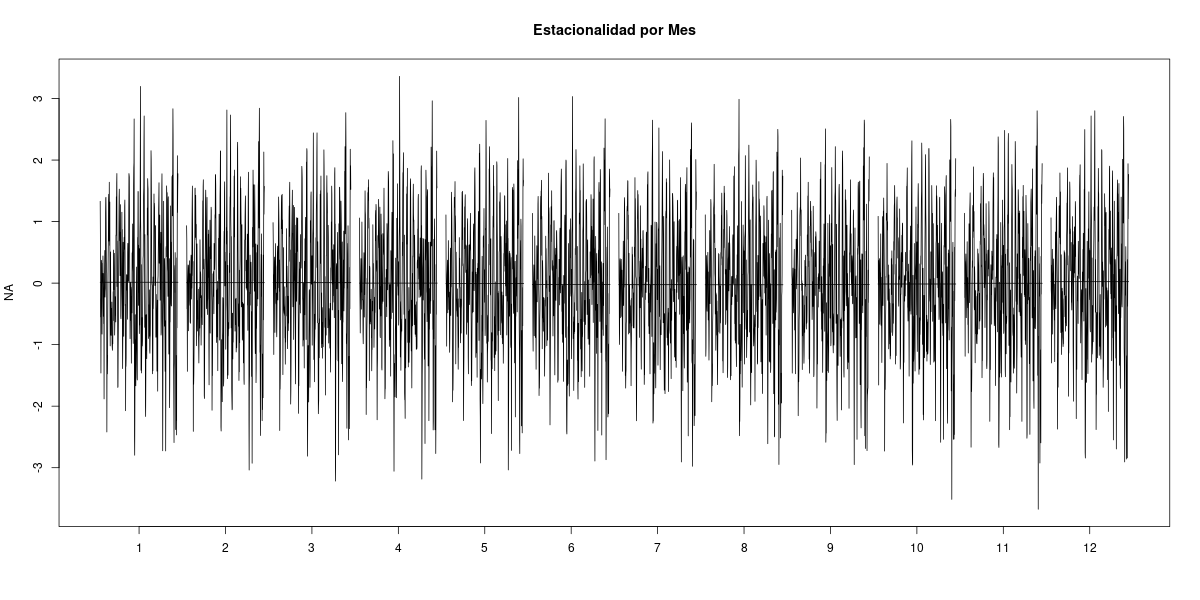

In [27]:
%%R -w 1200 -h 600

trend_removed <- 

monthplot(trend_removed, main = "Estacionalidad por Mes")

In [28]:
# Extraer el año de la fecha
df['Year'] = df['Date'].dt.year

# Crear el box plot utilizando plotly.express
fig = px.box(df, x='Year', y='Trend_Removed', title='Box Plot de trend_removed por Año', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Año', title_x=0.5)
fig.show()

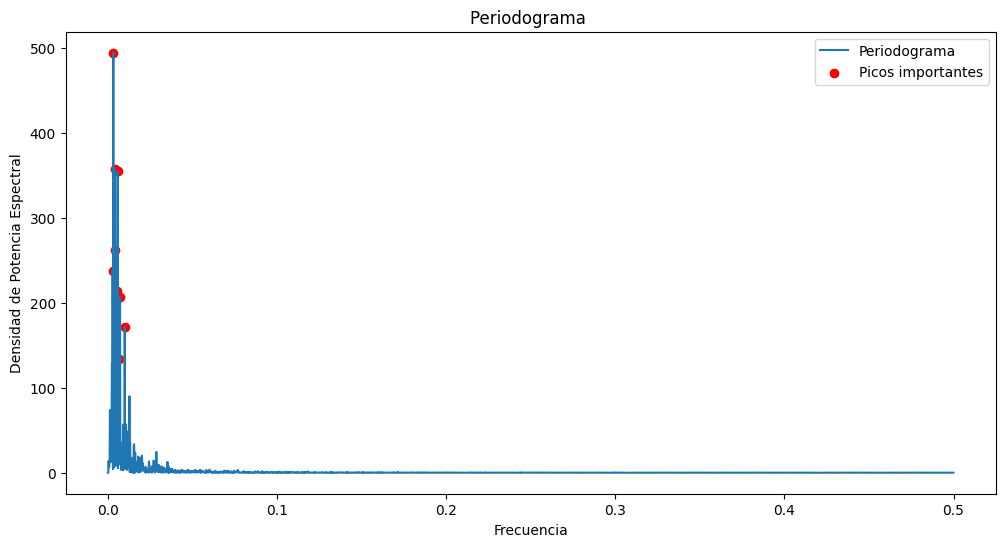

Los 10 Picos mas grandes para el periodograma son:


0           1           2           3           4  \
Frecuencia    0.00318    0.003975    0.005764    0.004373    0.002783   
Periodo     314.43750  251.550000  173.482759  228.681818  359.357143   

                     5           6           7           8           9  
Frecuencia    0.005565    0.007156    0.004572    0.009938    0.006758  
Periodo     179.678571  139.750000  218.739130  100.620000  147.970588

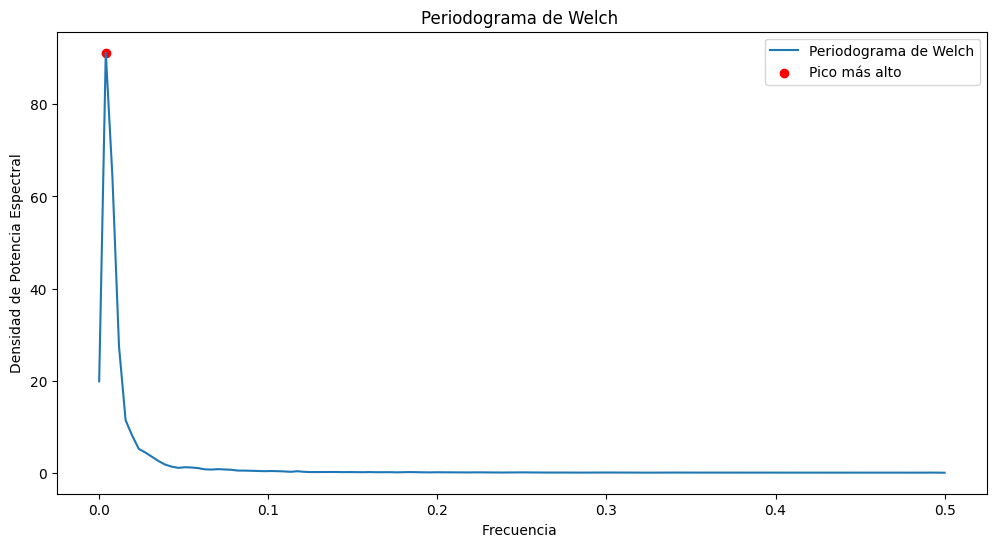

El pico más notorio se da: 
 - Frecuencia: 0.00390625  
 - Periodo: 256.0 


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import heapq


# Calcular el periodograma
f, Pxx_den = signal.periodogram(trend_removed)

# Encontrar los picos más importantes
peaks_indices = heapq.nlargest(10, range(len(Pxx_den)), key=Pxx_den.__getitem__)
f_freq = f[peaks_indices]
f_period = 1 / f[peaks_indices]

# Calcular el periodograma de Welch
f_welch, Pxx_den_welch = signal.welch(trend_removed)

# Encontrar el pico más alto del periodograma de Welch
max_index_value_welch = np.argmax(Pxx_den_welch)
frecuencia_max_welch = f_welch[max_index_value_welch]
frecuencia_pico_welch = 1 / frecuencia_max_welch




# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(f, Pxx_den, label='Periodograma')
plt.scatter(f[peaks_indices], Pxx_den[peaks_indices], color='red', label='Picos importantes')

plt.xlabel('Frecuencia')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma ')
plt.legend()
plt.show()

print('Los 10 Picos mas grandes para el periodograma son:')

# Crear DataFrame con las frecuencias y los periodos
data = {'Frecuencia': f_freq, 'Periodo': f_period}
df_frecuencias_periodos = pd.DataFrame(data)

# Mostrar el DataFrame
display(df_frecuencias_periodos.T)

# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.plot(f_welch, Pxx_den_welch, label='Periodograma de Welch')
plt.scatter(frecuencia_max_welch, Pxx_den_welch[max_index_value_welch], color='red', label='Pico más alto')

plt.xlabel('Frecuencia ')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma de Welch ')
plt.legend()
plt.show()

print(f'El pico más notorio se da: \n - Frecuencia: {frecuencia_max_welch}  \n - Periodo: {frecuencia_pico_welch} ')